#### GISC 420 T1 2022
# Dissolving and aggregating data

In [1]:
# You need to run this cell to get things setup
%matplotlib inline

import matplotlib
import matplotlib.pyplot as pyplot

import geopandas

import random

There are yet more spatial operations available. An important one is to dissolve spatial elements together based on some attribute, so that all elements that share the same value of that attribute are combined into a single elements and their associated data values are combined in some manner.

Again, it is useful to use a simple dataset to demonstrate this.

,id,value,row,col,geometry
0,0,178,0,0,"POLYGON ((0.000 0.000, 0.000 1.000, 1.000 1.00..."
1,1,121,1,0,"POLYGON ((0.000 1.000, 0.000 2.000, 1.000 2.00..."
2,2,133,2,0,"POLYGON ((0.000 2.000, 0.000 3.000, 1.000 3.00..."
3,3,136,3,0,"POLYGON ((0.000 3.000, 0.000 4.000, 1.000 4.00..."
4,4,178,4,0,"POLYGON ((0.000 4.000, 0.000 5.000, 1.000 5.00..."
...,...,...,...,...,...
59,59,181,3,7,"POLYGON ((7.000 3.000, 7.000 4.000, 8.000 4.00..."
60,60,160,4,7,"POLYGON ((7.000 4.000, 7.000 5.000, 8.000 5.00..."
61,61,110,5,7,"POLYGON ((7.000 5.000, 7.000 6.000, 8.000 6.00..."
62,62,187,6,7,"POLYGON ((7.000 6.000, 7.000 7.000, 8.000 7.00..."


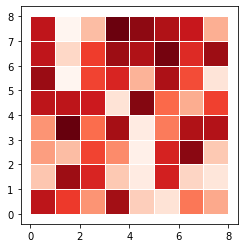

In [2]:
# More data
s3 = geopandas.read_file('squares3.geojson')
s3['id'] = range(s3.shape[0])
s3['value'] = [random.randint(100, 200) for i in range(s3.shape[0])]
s3['row'] = s3.id % 8
s3['col'] = s3.id // 8
s3.plot(column='value', cmap="Reds", edgecolor='w')
s3

In [6]:
d = s3.dissolve(by='col', aggfunc='mean', as_index=False)

In [7]:
d

,col,geometry,id,value,row
0,0,"POLYGON ((0.000 3.000, 0.000 4.000, 0.000 5.00...",3.5,161.000,3.5
1,1,"POLYGON ((1.000 3.000, 1.000 4.000, 1.000 5.00...",11.5,145.500,3.5
2,2,"POLYGON ((2.000 3.000, 2.000 4.000, 2.000 5.00...",19.5,153.625,3.5
3,3,"POLYGON ((3.000 3.000, 3.000 4.000, 3.000 5.00...",27.5,161.750,3.5
4,4,"POLYGON ((4.000 3.000, 4.000 4.000, 4.000 5.00...",35.5,140.500,3.5
5,5,"POLYGON ((5.000 3.000, 5.000 4.000, 5.000 5.00...",43.5,163.125,3.5
6,6,"POLYGON ((6.000 3.000, 6.000 4.000, 6.000 5.00...",51.5,157.750,3.5
7,7,"POLYGON ((7.000 3.000, 7.000 4.000, 7.000 5.00...",59.5,140.625,3.5


<AxesSubplot:>

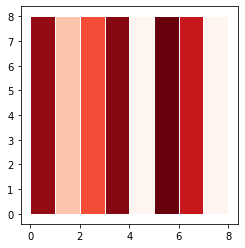

In [8]:
d.plot(column='value', cmap='Reds', edgecolor='w')

A variety of `aggfunc` options are available: `mean`, `median`, `prod`, `sum`, `std`, `var`. Experiment with them above.